<a href="https://colab.research.google.com/github/yskkwi/adding-up/blob/master/Python%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86%EF%BC%91%EF%BC%90%EF%BC%91%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF%E3%81%9D%E3%81%AE%EF%BC%92_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第４章　形態素解析・係り受け解析

## ３０：形態素解析ツール（Mecab)および係り受け解析ツール(Cabocha)のインストール

In [ ]:
# 確認日時（2020/7/19）
!apt install -y curl file git libmecab-dev make mecab mecab-ipadic-utf8 swig xz-utils
!pip install mecab-python3
import os

filename_crfpp = 'crfpp.tar.gz'
!wget "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ" \
    -O $filename_crfpp
!tar zxvf $filename_crfpp
%cd CRF++-0.58
!./configure
!make
!make install
%cd ..

os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib' 
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=\
$(wget --quiet --save-cookies /tmp/cookies.txt \
  --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- \
  | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha.tar.bz2
%cd cabocha-0.69
!./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8
!make
!make check
!make install
%cd ..

%cd cabocha-0.69/python
!python setup.py build_ext
!python setup.py install
!ldconfig
%cd ../
%cd cabocha-0.69
!make
!make check
!make install
%cd ../

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
xz-utils is already the newest version (5.2.2-1.3).
xz-utils set to manually installed.
curl is already the newest version (7.58.0-2ubuntu3.16).
git is already the newest version (1:2.17.1-1ubuntu0.9).
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-ipadic mecab-jumandic
  mecab-jumandic-utf8 mecab-utils swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-ipadic
  mecab-ipadic-utf8 mecab-jumandic mecab-jumandic-utf8 mecab-utils swig
  swig3.0
0 upgraded, 13 newly installed, 0 to remove and 37 not upgraded.
Need to get 30.4 MB of archives.
After this operation, 288 MB of additional disk space will be used.
Get:1 http://archiv

## ３１：インストールチェック

In [ ]:
!mecab --version
!cabocha --version

mecab of 0.996

cabocha of 0.69


## ３２：PythonからMeCab呼び出し

In [ ]:
# 2021/10/4追記
!pip install unidic-lite

     |████████████████████████████████| 47.4 MB 46 kB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=ebc4a57ea155af4d940c93a1de49e5a7db5a023187ce23dd44d94977c20fbbef
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


In [ ]:
import MeCab
t = MeCab.Tagger()
target = "私は永遠に駆け出しエンジニアスピリットで学び続けるんだ。そしてプロになるためにまず100本ノックしよう。"
t.parse(target)

'私\tワタクシ\tワタクシ\t私-代名詞\t代名詞\t\t\t0\nは\tワ\tハ\tは\t助詞-係助詞\t\t\t\n永遠\tエーエン\tエイエン\t永遠\t名詞-普通名詞-一般\t\t\t0\nに\tニ\tニ\tに\t助詞-格助詞\t\t\t\n駆け出し\tカケダシ\tカケダシ\t駆け出し\t名詞-普通名詞-一般\t\t\t0\nエンジニア\tエンジニア\tエンジニア\tエンジニア-engineer\t名詞-普通名詞-一般\t\t\t3\nスピリット\tスピリット\tスピリット\tスピリット-spirit\t名詞-普通名詞-一般\t\t\t2,3\nで\tデ\tデ\tで\t助詞-格助詞\t\t\t\n学び\tマナビ\tマナブ\t学ぶ\t動詞-一般\t五段-バ行\t連用形-一般\t0,2\n続ける\tツズケル\tツヅケル\t続ける\t動詞-非自立可能\t下一段-カ行\t連体形-一般\t0\nん\tン\tノ\tの\t助詞-準体助詞\t\t\t\nだ\tダ\tダ\tだ\t助動詞\t助動詞-ダ\t終止形-一般\t\n。\t\t\t。\t補助記号-句点\t\t\t\nそして\tソシテ\tソシテ\tそして\t接続詞\t\t\t0\nプロ\tプロ\tプロ\tプロ-pro\t名詞-普通名詞-一般\t\t\t1\nに\tニ\tニ\tに\t助詞-格助詞\t\t\t\nなる\tナル\tナル\t成る\t動詞-非自立可能\t五段-ラ行\t連体形-一般\t1\nため\tタメ\tタメ\t為\t名詞-普通名詞-副詞可能\t\t\t2\nに\tニ\tニ\tに\t助詞-格助詞\t\t\t\nまず\tマズ\tマズ\t先ず\t副詞\t\t\t1\n100\t100\t100\t100\t名詞-数詞\t\t\t0\n本\tポン\tホン\t本\t接尾辞-名詞的-助数詞\t\t\t\nノック\tノック\tノック\tノック-knock\t名詞-普通名詞-サ変可能\t\t\t1\nしよう\tシヨー\tスル\t為る\t動詞-非自立可能\tサ行変格\t意志推量形\t0\n。\t\t\t。\t補助記号-句点\t\t\t\nEOS\n'

## ３３：MeCabで分かち書き

In [ ]:
import MeCab
t = MeCab.Tagger("-Owakati")
target = "私は永遠に駆け出しエンジニアスピリットで学び続けるんだ。そしてプロになるためにまず100本ノックしよう。"
t.parse(target)

'私 は 永遠 に 駆け出し エンジニア スピリット で 学び 続ける ん だ 。 そして プロ に なる ため に まず 100 本 ノック しよう 。 \n'

## ３４：PythonからCaboCha呼び出し

In [ ]:
import CaboCha
cbc = CaboCha.Parser()
target = "私は永遠に駆け出しエンジニアスピリットで学び続けるんだ。そしてプロになるためにまず100本ノックしよう。"

cbc.parse(target).toString(CaboCha.FORMAT_LATTICE)

'* 0 4D 0/1 1.288665\n私\t名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n* 1 2D 0/1 1.618830\n永遠\t名詞,一般,*,*,*,*,永遠,エイエン,エイエン\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n* 2 4D 0/0 2.722558\n駆け出し\t動詞,自立,*,*,五段・サ行,連用形,駆け出す,カケダシ,カケダシ\n* 3 4D 1/2 3.204407\nエンジニア\t名詞,一般,*,*,*,*,エンジニア,エンジニア,エンジニア\nスピリット\t名詞,一般,*,*,*,*,スピリット,スピリット,スピリット\nで\t助詞,格助詞,一般,*,*,*,で,デ,デ\n* 4 11D 2/3 -1.049420\n学び\t動詞,自立,*,*,五段・バ行,連用形,学ぶ,マナビ,マナビ\n続ける\t動詞,非自立,*,*,一段,基本形,続ける,ツヅケル,ツズケル\nん\t名詞,非自立,一般,*,*,*,ん,ン,ン\nだ\t助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ\n。\t記号,句点,*,*,*,*,。,。,。\n* 5 11D 0/0 -1.049420\nそして\t接続詞,*,*,*,*,*,そして,ソシテ,ソシテ\n* 6 7D 0/1 2.079493\nプロ\t名詞,一般,*,*,*,*,プロ,プロ,プロ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n* 7 8D 0/0 2.449630\nなる\t動詞,自立,*,*,五段・ラ行,基本形,なる,ナル,ナル\n* 8 11D 0/1 -1.049420\nため\t名詞,非自立,副詞可能,*,*,*,ため,タメ,タメ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n* 9 11D 0/0 -1.049420\nまず\t副詞,一般,*,*,*,*,まず,マズ,マズ\n* 10 11D 1/1 -1.049420\n100\t名詞,数,*,*,*,*,*\n本\t名詞,接尾,助数詞,*,*,*,本,ホン,ホン\n* 11 -1D 1/2 0.000000\nノック\t名詞,サ変接続,*,*,*,*,ノック,ノック,ノック\nしよ\t動詞,自立,*,*,サ変・スル,未然ウ接続,する,シヨ

## ３５：CaboChaでツリー作成

In [ ]:
import CaboCha
cbc = CaboCha.Parser()
target = "私は永遠に駆け出しエンジニアスピリットで学び続けるんだ。そしてプロになるためにまず100本ノックしよう。"

print(cbc.parse(target).toString(CaboCha.FORMAT_TREE))

                  私は-------D              
                  永遠に-D   |              
                  駆け出し---D              
      エンジニアスピリットで-D              
              学び続けるんだ。-------------D
                          そして-----------D
                            プロに-D       |
                                なる-D     |
                                ために-----D
                                    まず---D
                                     100本-D
                              ノックしよう。
EOS



## ３６：係り受け解析器による抽出的文書要約

In [ ]:
import CaboCha
cbc = CaboCha.Parser()
target = "今日は猛暑の中エアコンをつけずに過ごした。その結果、この部屋は蒸し風呂のように暑い。"
print(cbc.parse(target).toString(CaboCha.FORMAT_LATTICE))

* 0 5D 0/1 1.460438
今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/1 1.105253
猛暑	名詞,一般,*,*,*,*,猛暑,モウショ,モーショ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 2 5D 0/0 3.005360
中	名詞,非自立,副詞可能,*,*,*,中,ナカ,ナカ
* 3 4D 0/1 1.899979
エアコン	名詞,一般,*,*,*,*,エアコン,エアコン,エアコン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 4 5D 0/2 3.404838
つけ	動詞,自立,*,*,一段,未然形,つける,ツケ,ツケ
ず	助動詞,*,*,*,特殊・ヌ,連用ニ接続,ぬ,ズ,ズ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 5 11D 0/1 -1.141536
過ごし	動詞,自立,*,*,五段・サ行,連用形,過ごす,スゴシ,スゴシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
* 6 7D 0/0 1.599230
その	連体詞,*,*,*,*,*,その,ソノ,ソノ
* 7 11D 0/0 -1.141536
結果	名詞,副詞可能,*,*,*,*,結果,ケッカ,ケッカ
、	記号,読点,*,*,*,*,、,、,、
* 8 9D 0/0 1.352889
この	連体詞,*,*,*,*,*,この,コノ,コノ
* 9 11D 0/1 -1.141536
部屋	名詞,一般,*,*,*,*,部屋,ヘヤ,ヘヤ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 10 11D 2/3 -1.141536
蒸し風呂	名詞,一般,*,*,*,*,蒸し風呂,ムシブロ,ムシブロ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
よう	名詞,非自立,助動詞語幹,*,*,*,よう,ヨウ,ヨー
に	助詞,副詞化,*,*,*,*,に,ニ,ニ
* 11 -1D 0/0 0.000000
暑い	形容詞,自立,*,*,形容詞・アウオ段,基本形,暑い,アツイ,アツイ
。	記号,句点,*,*,*,*,。,。,。
EOS



In [ ]:
import CaboCha
cbc = CaboCha.Parser()
target = "今日は猛暑の中エアコンをつけずに過ごした。その結果、この部屋は蒸し風呂のように暑い。"
id2phrase = {}
src2dst = {}
for line in cbc.parse(target).toString(CaboCha.FORMAT_LATTICE).split('\n'):
  if line and line != 'EOS':
    if line[0] == '*':
      # 係り受け関係を表す行
      # src_id
      src_id = int(line.split(' ')[1])
      # dst_id
      dst_id = line.split(' ')[2].strip("D")
      # src_idからdst_idへのマップ
      src2dst[src_id] = int(dst_id)
    else:
      # 形態素の情報を表す行
      row = line.split('\t')
      row[1].split(',')[0]
      # IDと文節
      if src_id not in id2phrase:
        id2phrase[src_id] = row[0]
      else:
        id2phrase[src_id] += row[0]

In [ ]:
id2phrase.items()

dict_items([(0, '今日は'), (1, '猛暑の'), (2, '中'), (3, 'エアコンを'), (4, 'つけずに'), (5, '過ごした。'), (6, 'その'), (7, '結果、'), (8, 'この'), (9, '部屋は'), (10, '蒸し風呂のように'), (11, '暑い。')])

In [ ]:
src2dst.items()

dict_items([(0, 5), (1, 2), (2, 5), (3, 4), (4, 5), (5, 11), (6, 7), (7, 11), (8, 9), (9, 11), (10, 11), (11, -1)])

In [ ]:
for src_id in src2dst:
  if src2dst[src_id] != -1:
    print(id2phrase[src_id], id2phrase[src2dst[src_id]])
  else:
    print(id2phrase[src_id])

今日は 過ごした。
猛暑の 中
中 過ごした。
エアコンを つけずに
つけずに 過ごした。
過ごした。 暑い。
その 結果、
結果、 暑い。
この 部屋は
部屋は 暑い。
蒸し風呂のように 暑い。
暑い。


In [ ]:
print(id2phrase[list(src2dst.values()).index(-1)])

暑い。


In [ ]:
print(id2phrase[list(src2dst.values()).index(list(src2dst.values()).index(-1))])

過ごした。


In [ ]:
import CaboCha

target = "今日は猛暑の中エアコンをつけずに過ごした。その結果、この部屋は蒸し風呂のように暑い。"

def cabocha_summarizer(target):
  cbc = CaboCha.Parser()
  id2phrase = {}
  src2dst = {}
  for line in cbc.parse(target).toString(CaboCha.FORMAT_LATTICE).split('\n'):
    if line and line != 'EOS':
      if line[0] == '*':
        # 係り受け関係を表す行
        # src_id
        src_id = int(line.split(' ')[1])
        # dst_id
        dst_id = line.split(' ')[2].strip("D")
        # src_idからdst_idへのマップ
        src2dst[src_id] = int(dst_id)
      else:
        # 形態素の情報を表す行
        row = line.split('\t')
        row[1].split(',')[0]
        # IDと文節
        if src_id not in id2phrase:
          id2phrase[src_id] = row[0]
        else:
          id2phrase[src_id] += row[0]
  
  
  return id2phrase[list(src2dst.values()).index(list(src2dst.values()).index(-1))]+id2phrase[list(src2dst.values()).index(-1)]

print(cabocha_summarizer(target))

過ごした。暑い。


## ３７：文頭の文節と述語による要約文

In [ ]:
print(id2phrase[min(src2dst.keys())]+id2phrase[list(src2dst.values()).index(-1)])

今日は暑い。


In [ ]:
import CaboCha
target = "僕は昨日、どうしても外に出て身体を動かしたくてジョギングにいった後、それでは飽き足りずに公園で友達と遊んだ"
def cabocha_summarizer2(target):
  cbc = CaboCha.Parser()
  id2phrase = {}
  src2dst = {}
  for line in cbc.parse(target).toString(CaboCha.FORMAT_LATTICE).split('\n'):
    if line and line != 'EOS':
      if line[0] == '*':
        # 係り受け関係を表す行
        # src_id
        src_id = int(line.split(' ')[1])
        # dst_id
        dst_id = line.split(' ')[2].strip("D")
        # src_idからdst_idへのマップ
        src2dst[src_id] = int(dst_id)
      else:
        # 形態素の情報を表す行
        row = line.split('\t')
        row[1].split(',')[0]
        # IDと文節
        if src_id not in id2phrase:
          id2phrase[src_id] = row[0]
        else:
          id2phrase[src_id] += row[0]
  
  
  return id2phrase[min(src2dst.keys())]+id2phrase[list(src2dst.values()).index(-1)]

print(cabocha_summarizer(target))

僕は遊んだ


## ３８：係り受け木の可視化

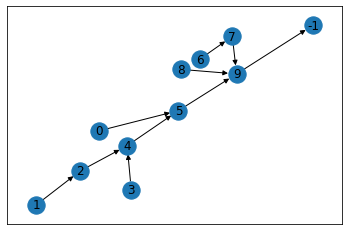

In [ ]:
import CaboCha
cbc = CaboCha.Parser()
target = "今日は１１時に過ぎまで執筆作業をして眠いが、充実感といったら半端ない。"
id2phrase = {}
src2dst = {}
for line in cbc.parse(target).toString(CaboCha.FORMAT_LATTICE).split('\n'):
  if line and line != 'EOS':
    if line[0] == '*':
      # 係り受け関係を表す行
      # src_id
      src_id = int(line.split(' ')[1])
      # dst_id
      dst_id = line.split(' ')[2].strip("D")
      # src_idからdst_idへのマップ
      src2dst[src_id] = int(dst_id)
    else:
      # 形態素の情報を表す行
      row = line.split('\t')
      row[1].split(',')[0]
      # IDと文節
      if src_id not in id2phrase:
        id2phrase[src_id] = row[0]
      else:
        id2phrase[src_id] += row[0]

import networkx as nx

nxdg = nx.DiGraph()
nxdg.add_edges_from(src2dst.items())
nx.draw_networkx(nxdg)

In [ ]:
print(id2phrase.items())

dict_items([(0, '今日は'), (1, '１１時に'), (2, '過ぎまで'), (3, '執筆作業を'), (4, 'して'), (5, '眠いが、'), (6, '充実感と'), (7, 'いったら'), (8, '半端'), (9, 'ない。')])


## ３９：Sentence Pieceによる分かち書き

In [ ]:
import codecs
import re
import requests
from bs4 import BeautifulSoup

url = "https://ja.wikipedia.org/wiki/"
keyword_list = [
    "デキサメタゾン", "レムデシビル", "ワクチン", "アビガン", "マスク"
]

corpus = []
for keyword in keyword_list:
    # コロナ対策に関する記事を取得
    response = requests.get(url + keyword)
    # htmlに変換
    html = response.text
    
    soup = BeautifulSoup(html, 'lxml')
    for p_tag in soup.find_all('p'):
        text = "".join(p_tag.text.strip().split(" "))
        if len(text) == 0:
            continue
        # 注釈の削除
        text = re.sub(r"\[注?釈?[0-9]+\]", "", text)
        corpus.append(text)
with open("savior.txt", "w") as f:
  for line in corpus:
   f.write(line+'\n')

In [ ]:
!cat savior.txt

デキサメタゾン（英:Dexamethasone）は、ステロイド系抗炎症薬(SAID)の一つである。炎症の原因に関係なく炎症反応・免疫反応を強力に抑制する。急性炎症、慢性炎症、自己免疫疾患、アレルギー性疾患などの際に使用される。内服薬の商品名デカドロン。ステロイド外用薬として使われ、日本での格付けで5段階中2-3のストロングとミディアムの医薬品がある。デキサメタゾンは1957年に発見された。WHO必須医薬品モデル・リストに収載されている。
先発品はデキサメタゾン（錠剤、エリキシル）またはそのリン酸エステルナトリウム塩（注射液。ネブライザーでも用いる）であるが、後発品にはメタスルホ安息香酸エステルナトリウム塩、シペシル酸エステル、吉草酸エステル、プロピオン酸エステル、パルミチン酸エステルといったバリエーションがあり、剤形も軟膏、クリーム、ローション、カプセル、口腔用軟膏、眼軟膏、点眼液、点鼻液、点耳液と多様である。
ステロイド外用薬では、日本での格付けで5段階中3のストロングでは、プロピオン酸デキサメタゾン（商品名メサデルム）や吉草酸デキサメタゾン（ボアラ、ザルックス）。2のミディアムでは、デキサメタゾン（グリメサゾン、オイラゾン）。
日本では1959年7月、デカドロン錠（0.5mg）の販売を開始し、2008年3月7日、医療事故防止対策に基づき「デカドロン錠」から「デカドロン錠0.5mg」に販売名変更の承認を得た。DECA（デカ）は「10」の意味を持つ接頭語であり、プレドニゾロンの約10倍の効力を有し、また、コルチゾンの10年後に開発されたという意味が込められた。2005年5月、抗悪性腫瘍剤投与に伴う消化器症状（悪心・嘔吐）の効能が追加となった。
2010年11月、萬有製薬株式会社から日医工株式会社に製造販売承認が承継された。2010年7月、多発性骨髄腫の治療薬として、セルジーン株式会社から「レナデックス錠4mg」が発売された。多発性骨髄腫の治療薬であるレナリドミド（Lenalidomide）に併用するデキサメタゾン
に由来する。2014年6月20日、日医工は「デカドロン錠4mg」の販売を開始した。
1961年4月、デキサメタゾンにグリセリンやエタノールなどを添加したエリキシル剤が、「デカドロンエリキシル」として販売を開始し、2008年6月20日、「デカドロンエリキシル

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train(
    '--input=savior.txt, --model_prefix=sentencepiece --character_coverage=1.0 --vocab_size=2000'
)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.Load("sentencepiece.model")
print(sp.EncodeAsPieces("デキサメタゾンが新型コロナに有効である可能性が示唆されており、アビガンやレムデシビルとともに救世主となるかが期待される。"))

['▁', 'デキサメタゾン', 'が', '新', '型', 'コ', 'ロ', 'ナ', 'に', '有効', 'である', '可', '能', '性', 'が', '示', '唆', 'されており', '、', 'アビガン', 'や', 'レムデシビル', 'と', 'と', 'も', 'に', '救', '世', '主', 'となる', 'か', 'が', '期', '待', 'される', '。']


# 第５章　単語ベクトル

## 40：WikiPediaの分かち書き

In [ ]:
with open("savior.txt", "r") as f:
  l = []
  for line in f:
    pieces = sp.EncodeAsPieces(line)
    l.append(pieces)
print(l[0])

['▁', 'デキサメタゾン', '(', '英', ':', 'D', 'e', 'x', 'a', 'm', 'e', 't', 'h', 'a', 's', 'on', 'e', ')', 'は', '、', 'ス', 'テ', 'ロ', 'イ', 'ド', '系', '抗', '炎症', '薬', '(', 'S', 'A', 'ID', ')', 'の', '一', 'つ', 'である', '。', '炎症', 'の', '原', '因', 'に', '関', '係', 'なく', '炎症', '反応', '・', '免', '疫', '反応', 'を', '強', '力', 'に', '抑', '制', 'する', '。', '急', '性', '炎症', '、', '慢', '性', '炎症', '、', '自', '己', '免', '疫', '疾', '患', '、', 'ア', 'レ', 'ル', 'ギ', 'ー', '性', '疾', '患', 'などの', '際', 'に', '使用される', '。', '内', '服', '薬', 'の', '商品名', 'デ', 'カ', 'ド', 'ロ', 'ン', '。', 'ス', 'テ', 'ロ', 'イ', 'ド', '外', '用', '薬', 'として', '使われ', '、', '日本での', '格', '付け', 'で', '5', '段', '階', '中', '2', '-', '3', 'の', 'スト', 'ロ', 'ング', 'と', 'ミ', 'デ', 'ィ', 'ア', 'ム', 'の', '医薬品', 'がある', '。', 'デキサメタゾン', 'は', '19', '5', '7', '年に', '発', '見', 'された', '。', 'WHO', '必', '須', '医薬品', 'モ', 'デ', 'ル', '・', 'リ', 'スト', 'に', '収', '載', 'されている', '。']


##４１：前処理

### １）単純forループによる実装

In [ ]:
res = []
l1 = l
for l2 in l1:
  tmpl = []
  for c in l2:
    if len(c) != 1:
      tmpl.append(c)
  res.append(tmpl)
print(res)

[['デキサメタゾン', 'on', '炎症', 'ID', 'である', '炎症', 'なく', '炎症', '反応', '反応', 'する', '炎症', '炎症', 'などの', '使用される', '商品名', 'として', '使われ', '日本での', '付け', 'スト', 'ング', '医薬品', 'がある', 'デキサメタゾン', '19', '年に', 'された', 'WHO', '医薬品', 'スト', 'されている'], ['デキサメタゾン', 'エリキシル', 'または', 'その', 'でも', 'である', 'には', 'った', 'ーション', 'があり', 'リー', 'ーション', 'である'], ['では', '日本での', '付け', 'スト', 'ング', 'では', 'デキサメタゾン', '商品名', 'デキサメタゾン', 'では', 'デキサメタゾン'], ['▁日本では', '19', 'mg', '販売', '200', '防止', '対策', 'から', 'mg', '販売名', '承認', 'EC', '10', 'を持つ', 'であり', '10', 'また', '10', '後に', '開発', 'された', 'という', 'られた', '200', '投与', '症状', '追加', 'となった'], ['▁20', '10', '11', '株式会社', 'から', '株式会社', '製造', '販売', '承認', 'された', '20', '10', '治療薬として', '株式会社', 'から', 'mg', 'された', '治療薬', 'である', 'en', 'al', '併用', 'する', 'デキサメタゾン'], ['する', '20', '14', '20', 'mg', '販売', '開始した'], ['19', 'デキサメタゾン', 'ール', 'など', 'した', 'エリキシル', '、「', 'エリキシル', 'として', '販売', '200', '20', '、「', 'エリキシル', 'され', 'された'], ['19', 'デキサメタゾン', '承認', 'った', '200', '販売名', 'から', 'mg', 'mg', 'mg', '、201', 'より', 'ジャ

### ２）リスト内法表記による実装

In [ ]:
res =[[w for w in l1 if len(w) != 1] for l1 in l]
print(res)

[['デキサメタゾン', 'on', '炎症', 'ID', 'である', '炎症', 'なく', '炎症', '反応', '反応', 'する', '炎症', '炎症', 'などの', '使用される', '商品名', 'として', '使われ', '日本での', '付け', 'スト', 'ング', '医薬品', 'がある', 'デキサメタゾン', '19', '年に', 'された', 'WHO', '医薬品', 'スト', 'されている'], ['デキサメタゾン', 'エリキシル', 'または', 'その', 'でも', 'である', 'には', 'った', 'ーション', 'があり', 'リー', 'ーション', 'である'], ['では', '日本での', '付け', 'スト', 'ング', 'では', 'デキサメタゾン', '商品名', 'デキサメタゾン', 'では', 'デキサメタゾン'], ['▁日本では', '19', 'mg', '販売', '200', '防止', '対策', 'から', 'mg', '販売名', '承認', 'EC', '10', 'を持つ', 'であり', '10', 'また', '10', '後に', '開発', 'された', 'という', 'られた', '200', '投与', '症状', '追加', 'となった'], ['▁20', '10', '11', '株式会社', 'から', '株式会社', '製造', '販売', '承認', 'された', '20', '10', '治療薬として', '株式会社', 'から', 'mg', 'された', '治療薬', 'である', 'en', 'al', '併用', 'する', 'デキサメタゾン'], ['する', '20', '14', '20', 'mg', '販売', '開始した'], ['19', 'デキサメタゾン', 'ール', 'など', 'した', 'エリキシル', '、「', 'エリキシル', 'として', '販売', '200', '20', '、「', 'エリキシル', 'され', 'された'], ['19', 'デキサメタゾン', '承認', 'った', '200', '販売名', 'から', 'mg', 'mg', 'mg', '、201', 'より', 'ジャ

In [ ]:
def extract2ormore(l):
  l1 = l
  res = []
  for l2 in l1:
    tmpl = []
    for c in l2:
      if len(c) != 1:
        tmpl.append(c)
    res.append(tmpl)
  return res

%timeit extract2ormore(l)

100 loops, best of 5: 3.22 ms per loop


In [ ]:
%timeit [[w for w in l1 if len(w) != 1] for l1 in l]

100 loops, best of 5: 2.8 ms per loop


In [ ]:
2.28 / 2.03

1.1231527093596059

In [ ]:
res1 = [[w for w in l1 if len(w) != 1] for l1 in l]
res2 = extract2ormore(l)
fail_cnt = 0
for l1, l2 in zip(res, res2):
  if l1 != l2:
    fail_cnt+=1
print(fail_cnt)

0


## ４２：ユニークな単語数

In [ ]:
res = {w for l1 in l for w in l1 if len(w) != 1}
print(len(res))

554


## ４３：ラベルエンコーディング

In [ ]:
#出現順でユニークな単語のリスト
res = [w for l1 in l for w in l1 if len(w) != 1]
res_sorted = sorted(set(res), key=res.index)
print(len(res_sorted))

554


In [ ]:
# 単語ID相互変換辞書
word2idx = {}
idx2word = {}
for i, word in enumerate(res_sorted):
  word2idx[word] = i
  idx2word[i] = word
print(list(word2idx.items())[:5])
print(list(idx2word.items())[:5])

[('デキサメタゾン', 0), ('on', 1), ('炎症', 2), ('ID', 3), ('である', 4)]
[(0, 'デキサメタゾン'), (1, 'on'), (2, '炎症'), (3, 'ID'), (4, 'である')]


In [ ]:
#ラベルエンコーディング
encoded_text =[[word2idx[w] for w in l1 if len(w) != 1] for l1 in l]
print(encoded_text[:3])

[[0, 1, 2, 3, 4, 2, 5, 2, 6, 6, 7, 2, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 0, 19, 20, 21, 22, 17, 15, 23], [0, 24, 25, 26, 27, 4, 28, 29, 30, 31, 32, 30, 4], [33, 13, 14, 15, 16, 33, 0, 10, 0, 33, 0]]


## ４４：共起行列

In [ ]:
def ngram(s, n):
 """ ngramを計算して返却

   Args:
     s(str):解析対象文字列
     n(int):n
   Returns:
     ngram(list):n-gramリスト

 """
 ngram = []
 for i in range(len(s)):
   if i + n >= len(s):
     break
   tpl = tuple()
   for j in range(n):
     tpl += (s[i+j],)
   ngram.append(tpl)
 return ngram

In [ ]:
# 2gramを計算
bigrams = []
for wl in encoded_text:
  bigrams.append(ngram(wl, 2))
  
print(bigrams[0])

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 2), (2, 5), (5, 2), (2, 6), (6, 6), (6, 7), (7, 2), (2, 2), (2, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 0), (0, 19), (19, 20), (20, 21), (21, 22), (22, 17), (17, 15)]


In [ ]:
# 共起行列初期化
import numpy as np
z = np.zeros((len(res_sorted), len(res_sorted)), dtype=np.int)
for bigram_lst in bigrams:
  for bigram in bigram_lst:
    z[bigram[0], bigram[1]] += 1
    z[bigram[1], bigram[0]] += 1

In [ ]:
z

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
w = "デキサメタゾン"
if w in word2idx:
  print(f"{idx2word[word2idx[w]]}:\n{z[word2idx[w]]}")

デキサメタゾン:
[0 1 0 0 0 0 1 0 0 1 2 1 0 0 0 0 0 0 1 4 0 0 0 0 1 0 0 0 0 0 0 0 2 3 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

## ４６：ユークリッド距離

In [ ]:
import numpy as np
w1 = "デキサメタゾン"
w2 ="医薬品"
w3 = "ファビピラビル"
w4 = "富士フイルム"

# デキサメタゾン　- 医薬品　のユークリッド距離
print(np.linalg.norm(z[word2idx[w1]] - z[word2idx[w2]]))

# ファビピラビル　- 富士フィルム　のユークリッド距離
print(np.linalg.norm(z[word2idx[w3]] - z[word2idx[w4]]))

# デキサメタゾン　- 富士フィルム　のユークリッド距離
print(np.linalg.norm(z[word2idx[w1]] - z[word2idx[w4]]))

9.273618495495704
16.06237840420901
11.704699910719626


## ４７：内積

In [ ]:
import numpy as np
w1 = "デキサメタゾン"
w2 ="医薬品"
w3 = "ファビピラビル"
w4 = "富士フイルム"

# デキサメタゾン　- 医薬品　の内積
print(z[word2idx[w1]]@z[word2idx[w2]])

# ファビピラビル　- 富士フィルム　の内積
print(z[word2idx[w3]]@z[word2idx[w4]])

# デキサメタゾン　- 富士フィルム　の内積
print(z[word2idx[w1]]@z[word2idx[w4]])

8
7
0


$$
\displaystyle{ \cos \theta =  \frac{ \vec{a} \cdot \vec{b} }{\vert \vec{a}\vert \vert \vec{b} \vert} }
$$

## ４８：コサイン類似度

In [ ]:
import numpy as np
w1 = "デキサメタゾン"
w2 ="医薬品"
w3 = "ファビピラビル"
w4 = "富士フイルム"

# デキサメタゾン　- 医薬品　のコサイン類似度
print(z[word2idx[w1]]@z[word2idx[w2]]/(np.linalg.norm(z[word2idx[w1]])*np.linalg.norm(z[word2idx[w2]])))

# ファビピラビル　- 富士フィルム　のコサイン類似度
print(z[word2idx[w3]]@z[word2idx[w4]]/(np.linalg.norm(z[word2idx[w3]])*np.linalg.norm(z[word2idx[w4]])))

# デキサメタゾン　- 富士フィルム　のコサイン類似度
print(z[word2idx[w1]]@z[word2idx[w4]]/(np.linalg.norm(z[word2idx[w1]])*np.linalg.norm(z[word2idx[w4]])))

0.1738719632737246
0.06067033396213444
0.0


## ４９：コサイン類似度トップ１０の単語

In [ ]:
norms = np.linalg.norm(z, axis=0)
[idx2word[w] for w in np.argsort(-z[word2idx["ワクチン"]]@z/(norms[word2idx["ワクチン"]]*norms))[:10]]

['ワクチン', 'ワクチンの', 'して', '同日', '天然痘', 'されている', 'する', 'メーカー', 'である', 'として']

# 第６章　機械学習―入力データ・正解データの準備

## ５０：Livedoorニュースコーパスの取得・整形

In [ ]:
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

--2020-07-24 19:59:50--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz.1’

ldcc-20140209.tar.g 100%[===================>]   8.44M  6.05MB/s    in 1.4s    

2020-07-24 19:59:52 (6.05 MB/s) - ‘ldcc-20140209.tar.gz.1’ saved [8855190/8855190]



In [ ]:
!tar zxvf ldcc-20140209.tar.gz

ストリーミング出力は最後の 5000 行に切り捨てられました。
text/smax/smax-6833494.txt
text/smax/smax-6833579.txt
text/smax/smax-6834422.txt
text/smax/smax-6834562.txt
text/smax/smax-6834765.txt
text/smax/smax-6834990.txt
text/smax/smax-6835318.txt
text/smax/smax-6838218.txt
text/smax/smax-6838260.txt
text/smax/smax-6838332.txt
text/smax/smax-6838453.txt
text/smax/smax-6838514.txt
text/smax/smax-6838627.txt
text/smax/smax-6838702.txt
text/smax/smax-6842164.txt
text/smax/smax-6842219.txt
text/smax/smax-6842269.txt
text/smax/smax-6842402.txt
text/smax/smax-6842629.txt
text/smax/smax-6842882.txt
text/smax/smax-6843206.txt
text/smax/smax-6845003.txt
text/smax/smax-6847081.txt
text/smax/smax-6849018.txt
text/smax/smax-6850114.txt
text/smax/smax-6850391.txt
text/smax/smax-6850789.txt
text/smax/smax-6851590.txt
text/smax/smax-6851919.txt
text/smax/smax-6853063.txt
text/smax/smax-6853346.txt
text/smax/smax-6853751.txt
text/smax/smax-6854198.txt
text/smax/smax-6855347.txt
text/smax/smax-6855946.txt
text/smax/smax-6856195.

In [ ]:
!head -3 text/dokujo-tsushin/dokujo-tsushin-6915005.txt
!head -3 text/it-life-hack/it-life-hack-6576574.txt

http://news.livedoor.com/article/detail/6915005/
2012-09-03T14:00:00+0900
男女間で“カワイイ”の基準が異なる理由
http://news.livedoor.com/article/detail/6576574/
2012-05-20T10:00:00+0900
2012年夏モデルも紹介！　新しいネットサービスから新型CPUネタやiアプリまで【デジ通】一気読み


In [ ]:
import glob
files = glob.glob("./text/*/*.txt")
len(files)

7376

In [ ]:
import os
records = []
for fl in files:
  if os.path.exists(fl) and os.path.isfile(fl):
    sep_fp = fl.split('/')
    category = sep_fp[2]
    fname = sep_fp[-1]
    if fname == 'LICENSE.txt':
      continue
    with open(fl, 'r') as f:
      lines = f.readlines()
      url = lines[0].strip('\n')
      timestamp = lines[1].strip('\n')
      article = (''.join(lines[2:])).strip('\n')
      records.append([category, url, timestamp, article])

In [ ]:
import pandas as pd
df = pd.DataFrame(records, columns=['カテゴリ', 'URL', 'タイムスタンプ', '記事本文'])
df.to_csv('livedoor.csv', encoding='utf8', index=None)
len(df)

7367

In [ ]:
df.sample(10)

,カテゴリ,URL,タイムスタンプ,記事本文
5771,sports-watch,http://news.livedoor.com/article/detail/6577722/,2012-05-21T09:00:00+0900,渦中の香川真司にインタビュー、「ズバリ次のチーム、話を伺いたい」\n20日放送、NHK「サン...
3016,dokujo-tsushin,http://news.livedoor.com/article/detail/5971298/,2011-10-27T14:00:00+0900,恋と仕事のマンネリ打破テクニックとは？\n恋も仕事も人生も、それなりに経験が積み上がってくる...
3161,dokujo-tsushin,http://news.livedoor.com/article/detail/5022310/,2010-09-21T14:00:00+0900,赤裸々な女の生態を描く「祝女」が帰ってくる！\n歳を経ていくと、世の中の仕組みや現実というも...
218,it-life-hack,http://news.livedoor.com/article/detail/6882227/,2012-08-23T17:00:00+0900,真夏のダンスに15万人が熱狂 大盛況だったニコニコダンスマスター4レポート\n以前紹介したよ...
5421,peachy,http://news.livedoor.com/article/detail/4773875/,2010-05-17T15:45:00+0900,“あなたの人生史上、最高の実話” サンドラ・ブロック最高の演技が待望のリリース\n 全米で興...
1141,kaden-channel,http://news.livedoor.com/article/detail/6200825/,2012-01-18T12:00:00+0900,英語版WikipediaがSOPAへの抗議で24時間サイトを閉鎖！米国Googleも抗議表明...
5430,peachy,http://news.livedoor.com/article/detail/4492986/,2009-12-09T11:20:00+0900,住宅街のパン屋さんで、もちもちベーグルを習ってきました！\n 働く女子のみなさん、こんにちは...
6129,sports-watch,http://news.livedoor.com/article/detail/5103514/,2010-10-28T23:50:00+0900,【Sports Watch】亀田姫月がブログ開始。史郎氏は「中身は男」 \nボクシング・亀田...
2479,topic-news,http://news.livedoor.com/article/detail/6345530/,2012-03-07T12:31:00+0900,フジテレビの姿勢に非難殺到…番組で″火渡り″させ、老人が歩行不能の大火傷\n「週刊文春」（3...
4057,smax,http://news.livedoor.com/article/detail/6644560/,2012-06-10T17:55:00+0900,【KDDIとHTCが協業！日本仕様のWiMAX対応au初Android 4.0搭載スマートフ...


## ５１：ユニークなカテゴリ数

In [ ]:
len(set(df['カテゴリ']))

9

## ５２：正解ラベルの作成

In [ ]:
categories = list(set(df['カテゴリ']))
cat2id = {cat:i for i, cat in enumerate(categories)}
print(cat2id.items())

dict_items([('livedoor-homme', 0), ('topic-news', 1), ('dokujo-tsushin', 2), ('it-life-hack', 3), ('peachy', 4), ('sports-watch', 5), ('smax', 6), ('movie-enter', 7), ('kaden-channel', 8)])


In [ ]:
labels = []
for cat in df['カテゴリ']:
  labels.append(cat2id[cat])
len(labels)

7367

## ５３：改行コードで分割

In [ ]:
import pandas as pd

ret_lst = []
for article in df['記事本文']:
  lines = article.split('\n')
  for line in lines:
    if line:
      ret_lst.append(line)
pd.DataFrame(ret_lst).to_csv('article_ret.txt',index=None, header=None)

In [ ]:
!wc -l article_ret.txt

143711 article_ret.txt


In [ ]:
len(ret_lst)

143711

In [ ]:
ret_lst[1803]

'GW GTX660TI 2GBD5 PHANTOM '

## ５４：Sentence Pieceをlivedoorコーパスで訓練

In [ ]:
!pip install sentencepiece

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train(
    '--input=article_ret.txt, --model_prefix=article --character_coverage=1.0 --vocab_size=8000'
)

## ５５：livedoorコーパスで訓練したSentence Pieceで分かち書き

In [ ]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.Load("article.model")
print(sp.EncodeAsPieces("車だったらやっぱりAudiのRS4ワールドパフォーマンスカーに乗ってみたいな。"))

['▁', '車', 'だったら', 'やっぱり', 'A', 'u', 'd', 'i', 'の', 'R', 'S', '4', 'ワールド', 'パフォーマンス', 'カー', 'に', '乗', 'って', 'みたいな', '。']


## ５６：記事本文をSentence Pieceで分かち書き

In [ ]:
article_sp = []
for article in df['記事本文']:
  article_sp.append(sp.EncodeAsPieces(article))
len(article_sp)

7367

##５７：ユニークな単語数

In [ ]:
len(set([token for tokens in article_sp for token in tokens]))

7998

## ５８：ラベルエンコーディング

In [ ]:
#出現順でユニークな単語のリスト
all_tokens = [token for tokens in article_sp for token in tokens]
sorted_utokens = sorted(set(all_tokens), key=all_tokens.index)
print(len(sorted_utokens))

7998


In [ ]:
# 単語ID相互変換辞書
word2idx = {}
idx2word = {}
for i, word in enumerate(sorted_utokens):
  word2idx[word] = i
  idx2word[i] = word
print(list(word2idx.items())[:5])
print(list(idx2word.items())[:5])

[('▁', 0), ('インタビュー', 1), (':', 2), ('キング', 3), ('コン', 4)]
[(0, '▁'), (1, 'インタビュー'), (2, ':'), (3, 'キング'), (4, 'コン')]


In [ ]:
#ラベルエンコーディング
encoded_text =[[word2idx[token] for token in tokens] for tokens in article_sp]
print(encoded_text[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 18, 25, 26, 27, 28, 23, 29, 30, 31, 32, 33, 34, 35, 6, 36, 12, 37, 38, 39, 40, 41, 42, 26, 43, 44, 45, 23, 27, 28, 46, 47, 48, 49, 50, 51, 52, 53, 26, 54, 55, 56, 57, 58, 59, 60, 61, 1, 26, 62, 63, 64, 14, 65, 28, 23, 3, 4, 5, 26, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 28, 23, 90, 91, 79, 92, 14, 15, 16, 6, 28, 93, 94, 14, 95, 96, 97, 12, 14, 98, 99, 37, 100, 101, 102, 26, 103, 104, 105, 106, 107, 37, 23, 108, 109, 14, 110, 37, 111, 112, 113, 114, 115, 116, 85, 23, 117, 118, 119, 120, 121, 87, 122, 123, 58, 23, 124, 125, 126, 127, 128, 129, 14, 130, 131, 6, 132, 133, 0, 134, 135, 136, 137, 138, 139, 140, 0, 141, 12, 19, 142, 143, 33, 144, 14, 145, 146, 37, 24, 147, 148, 107, 23, 149, 150, 151, 26, 152, 24, 144, 153, 25, 37, 154, 155, 156, 157, 158, 159, 160, 28, 161, 0, 81, 82, 83, 84, 75, 162, 23, 81, 82, 163, 164, 165, 166, 14, 63, 167

## ５９：共起行列

In [ ]:
def ngram(s, n):
 """ ngramを計算して返却

   Args:
     s(str):解析対象文字列
     n(int):n
   Returns:
     ngram(list):n-gramリスト

 """
 ngram = []
 for i in range(len(s)):
   if i + n >= len(s):
     break
   tpl = tuple()
   for j in range(n):
     tpl += (s[i+j],)
   ngram.append(tpl)
 return ngram


In [ ]:
# 2gramを計算
bigrams = []
for wl in encoded_text:
  bigrams.append(ngram(wl, 2))
  
print(bigrams[0])

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 0), (0, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 18), (18, 25), (25, 26), (26, 27), (27, 28), (28, 23), (23, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 6), (6, 36), (36, 12), (12, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 26), (26, 43), (43, 44), (44, 45), (45, 23), (23, 27), (27, 28), (28, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 26), (26, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 1), (1, 26), (26, 62), (62, 63), (63, 64), (64, 14), (14, 65), (65, 28), (28, 23), (23, 3), (3, 4), (4, 5), (5, 26), (26, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), 

In [ ]:
# 共起行列初期化
import numpy as np
z = np.zeros((len(sorted_utokens), len(sorted_utokens)), dtype=np.int)
for bigram_lst in bigrams:
  for bigram in bigram_lst:
    z[bigram[0], bigram[1]] += 1
    z[bigram[1], bigram[0]] += 1
z

In [ ]:
z

array([[  0, 103, 872, ...,   0,   0,   0],
       [103,   0, 158, ...,   0,   0,   0],
       [872, 158,  12, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

# 第７章）機械学習

## ６０：入力データの変換

In [ ]:
vectors= []
for ids in encoded_text:
  vec =  np.zeros(len(sorted_utokens),dtype=np.int)
  for id in ids:
    vec += z[id]
  vectors.append(vec)
len(vectors)

7367

## ６１：訓練データと評価データの分割

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vectors, labels, train_size=0.7)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5156
5156
2211
2211


## ６２：ロジスティック回帰

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## ６３：正解率の評価

$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.5988240615106287


## ６４：Randam Forestによる学習と評価

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.7584803256445047


## ６５：SVM（サポートベクターマシン）による学習と評価

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf')
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.5079149706015378


## ６６：k-近傍法による学習と評価

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.5002261420171868


## ６７：前処理による改善

In [ ]:
len(set([token for tokens in article_sp for token in tokens if len(token) != 1]))

4349

In [ ]:
#出現順でユニークな単語のリスト
all_tokens = [token for tokens in article_sp for token in tokens if len(token) != 1]
sorted_utokens = sorted(set(all_tokens), key=all_tokens.index)
print(len(sorted_utokens))

# 単語ID相互変換辞書
word2idx = {}
idx2word = {}
for i, word in enumerate(sorted_utokens):
  word2idx[word] = i
  idx2word[i] = word
print(list(word2idx.items())[:5])
print(list(idx2word.items())[:5])

#ラベルエンコーディング
encoded_text =[[word2idx[token] for token in tokens if len(token) != 1] for tokens in article_sp]
print(encoded_text[0])

4349
[('インタビュー', 0), ('キング', 1), ('コン', 2), ('楽しく', 3), ('ない', 4)]
[(0, 'インタビュー'), (1, 'キング'), (2, 'コン'), (3, '楽しく'), (4, 'ない')]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 16, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 40, 41, 1, 2, 42, 43, 44, 45, 46, 47, 48, 49, 50, 9, 10, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 37, 61, 62, 63, 64, 65, 66, 67, 68, 69, 20, 70, 71, 72, 73, 74, 70, 15, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 83, 8, 85, 86, 87, 88, 89, 90, 91, 92, 93, 74, 15, 94, 95, 96, 97, 98, 99, 100, 101, 102, 93, 103, 104, 95, 105, 106, 107, 83, 84, 83, 8, 85, 108, 109, 110, 111, 112, 88, 76, 113, 74, 114, 77, 78, 115, 116, 117, 93, 118, 119, 120, 12, 15, 121, 122, 123, 124, 125, 126, 127, 128, 121, 122, 129, 130, 131, 127, 132, 133, 88, 134, 135, 136, 137, 138, 139, 116, 140, 12, 141, 142, 143, 90, 79, 144, 145, 146, 147, 136, 148, 149, 129, 150, 107, 151, 152, 153, 85, 93, 154, 88, 38, 155, 156, 74, 157, 47, 2

In [ ]:
def ngram(s, n):
 """ ngramを計算して返却

   Args:
     s(str):解析対象文字列
     n(int):n
   Returns:
     ngram(list):n-gramリスト

 """
 ngram = []
 for i in range(len(s)):
   if i + n >= len(s):
     break
   tpl = tuple()
   for j in range(n):
     tpl += (s[i+j],)
   ngram.append(tpl)
 return ngram

# 2gramを計算
bigrams = []
for wl in encoded_text:
  bigrams.append(ngram(wl, 2))
  
print(bigrams[0])

# 共起行列初期化
import numpy as np
z = np.zeros((len(sorted_utokens), len(sorted_utokens)), dtype=np.int)
for bigram_lst in bigrams:
  for bigram in bigram_lst:
    z[bigram[0], bigram[1]] += 1
    z[bigram[1], bigram[0]] += 1

print(z)


[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 12), (12, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 16), (16, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 0), (0, 40), (40, 41), (41, 1), (1, 2), (2, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 9), (9, 10), (10, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 37), (37, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 20), (20, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 70), (70, 15), (15, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 83), (83, 8), (8, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90)

In [ ]:
vectors= []
for ids in encoded_text:
  vec =  np.zeros(len(sorted_utokens),dtype=np.int)
  for id in ids:
    vec += z[id]
  vectors.append(vec)
len(vectors)

7367

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vectors, labels, train_size=0.7)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5156
5156
2211
2211


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.8521031207598372


## ６８：文章からカテゴリ予測

In [ ]:
target_text = df['記事本文'][1900]

target_text

'クリスマスはテレビを見よう！\u3000２３日は家政婦じゃない松嶋菜々子を堪能！金曜ロードショーは「ゴースト\u3000もういちど抱きしめたい」【クリスマス】\nドラマ「家政婦のミタ」（日本テレビ系）がヒットしている。このヒットで「やはり松嶋菜々子は視聴率の女王だ」という声も上がっているが、ミタを演じる松嶋菜々子の無表情で淡々とした演技が印象的だ。久しぶりに美しく表情豊かな彼女を見たいという人や、もちろん冬の夜ならではの大人の恋愛映画を見たいという人は「金曜ロードショー」（日テレ系）を見てはいかがだろう。\n松嶋菜々子とソン・スンホンが主演を務める「ゴースト\u3000もういちど抱きしめたい」が21時から放送される。これはパトリック・スウェイジ＆デミ・ムーア主演の大ヒット恋愛映画「ゴースト\u3000ニューヨークの幻」をリメイクし、公開当時も大きな話題になった映画だ。\n\nカップルで過ごす人は、大切な人を思う切ないストーリーに愛を深めあってもいいし、一人で見る人もあえて恋愛モードに切り替えてみてもいいかもしれない・・・・・・？\n\nゴースト\u3000もういちど抱きしめたい\n\n■関連記事\nテレビ離れなんて関係ない！「家政婦のミタ」人気がすごすぎる！！\nクリスマスはテレビを見よう！\u3000クリスマスを恨めしく思う女子はイブの夜に「祝女」スペシャルがおすすめ\nクリスマスはテレビを見よう！\u3000２３日はNHKスペシャル「世界を変えた男 スティーブ・ジョブズ」が放送に    \n\n■関連記事\n・野球の次は中国市場でも勢いを見せる！\u3000モバゲーが中国スマホに標準搭載へ【話題】\n・スマホゲームへの移り変わりに要注意！\u3000いままでのゲームと同じだとビジネスチャンスを逃す！【話題】\n・スマホの似合う著名人、トップはスマホそのもの（？）な渡辺謙【話題】\n・スタジアムにいなくても一緒に応援！\u3000バルセロナVSアルサッド戦で「VAMOS VIEWING」初体験【レポート】\n・今年一番秋葉でがんばったのはだれ？\u3000PC萌えキャラ人気コンテスト投票開始【話題】'

In [ ]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.Load("article.model")
tokens = sp.EncodeAsPieces(target_text)

In [ ]:
#1文字トークン除外
all_tokens = [token for tokens in article_sp for token in tokens if len(token) != 1]
sorted_utokens = sorted(set(all_tokens), key=all_tokens.index)

#ラベルエンコーディング
encoded_text =[word2idx[token] for token in tokens if len(token) != 1]

#記事ベクトル生成
article_vecs = []
article_vec = np.zeros(len(sorted_utokens), dtype=np.int)
for i in encoded_text:
  article_vec+=z[i]

#予測時の形を合わせるため
article_vecs.append(article_vec)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(article_vecs)

In [ ]:
y_pred

array([1])

In [ ]:
labels[1800]

1

In [ ]:
categories

['livedoor-homme',
 'kaden-channel',
 'topic-news',
 'dokujo-tsushin',
 'smax',
 'movie-enter',
 'sports-watch',
 'peachy',
 'it-life-hack']

## ６９：Word2Vec

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 166kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import word2vec

docs = [[w for w in article2 if len(w) != 1] for article2 in article_sp]

model = word2vec.Word2Vec(docs, size=100, min_count=1, window=5)
model.save("./livedoor_w2v.model")

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load("./livedoor_w2v.model")

In [ ]:
model.wv.most_similar(positive=['ニュース'])

[('ライフハック', 0.6853103637695312),
 ('新聞', 0.6839464902877808),
 ('ちゃんねる', 0.6601943373680115),
 ('芸能', 0.6470254063606262),
 ('NHK', 0.617395281791687),
 ('ランキング', 0.606293797492981),
 ('WEB', 0.6002820134162903),
 ('アンドロイド', 0.5936285257339478),
 ('情報', 0.5927809476852417),
 ('Yahoo', 0.5842441916465759)]

In [ ]:
import numpy as np

livedoor_w2v = []

for doc in docs:
  vec = np.zeros(100)
  for word in doc:
    if word in model.wv:
      vec+=model.wv[word]
  livedoor_w2v.append(vec)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(livedoor_w2v, labels, train_size=0.7)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5156
5156
2211
2211


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.8421528720036183


# 第８章）深層学習

## ７０：ktrainのセットアップ

In [ ]:
!pip install ktrain 

     |████████████████████████████████| 25.2MB 129kB/s 
     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 6.7MB 25.9MB/s 
     |████████████████████████████████| 983kB 54.2MB/s 
     |████████████████████████████████| 245kB 59.3MB/s 
     |████████████████████████████████| 778kB 46.6MB/s 
     |████████████████████████████████| 471kB 52.4MB/s 
     |████████████████████████████████| 3.9MB 51.8MB/s 
     |████████████████████████████████| 450kB 52.9MB/s 
     |████████████████████████████████| 3.0MB 47.6MB/s 
     |████████████████████████████████| 890kB 48.8MB/s 
     |████████████████████████████████| 1.1MB 40.5MB/s 
  Created wheel for ktrain: filename=ktrain-0.18.5-cp36-none-any.whl size=25253441 sha256=34dae4b679ddf5fd4141ffdff352051ff71a0e93b68b130d1fc20bb009343eca
  Stored in directory: /root/.cache/pip/wheels/29/33/cd/2a24a3b6344bb291ede07a903985664bf747b3ea50d9c05ce4
  Created wheel for keras-bert: filename=keras_bert-0.85.0-cp36-no

## ７１：Tensorflowのバージョン確認

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.1.0


## ７２：GPU利用の確認


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1989519774116500777, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13532346517523600829
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 212668757909430398
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7286440543982995975
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## ７３：fetch_20newsgroups

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=0)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=0)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [ ]:
train_b.data[0]

'From: reedr@cgsvax.claremont.edu\nSubject: Re: DID HE REALLY RISE???\nOrganization: The Claremont Graduate School\nLines: 29\n\nIn article <Apr.9.01.11.16.1993.16937@athos.rutgers.edu>, emery@tc.fluke.COM (John Emery) writes:\n> The one single historic event that has had the biggest impact on the\n> world over the centuries is the resurrection of Jesus.  At the same\n> time, it is one of the most hotly contested topics....\n> \n> Did Jesus Christ really rise from the dead?  Since the eyewitnesses\n> are no longer living, we have only their written accounts. ...\n> ...  Because of the magnitude of significance\n> involved here, either the resurrection is the greatest event in the\n> history of man or the greatest deception played on man.\n> [massive amounts of data deleted]\n\nJohn, \n\nWhile I will not take the time to rebut you point by point, I will suggest\nthree current works which I think will be helpful in your quest to answer\nthis question.  John Dominic Crossan (Professor of 

In [ ]:
train_b.target[0]

3

In [ ]:
classes = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
classes[train_b.target[0]]

'soc.religion.christian'

## ７４：BERTを蒸留したモデルの定義

In [ ]:
import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=train_b.target_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

task: text classification
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


## ７５：分類用BERTモデルの定義

In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


## ７６：BERTによる学習

In [ ]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Train on 2257 samples
Epoch 1/4
2257/2257 [==============================] - 296s 131ms/sample - loss: 0.6987 - accuracy: 0.7129
Epoch 2/4
2257/2257 [==============================] - 280s 124ms/sample - loss: 0.1671 - accuracy: 0.9424
Epoch 3/4
2257/2257 [==============================] - 281s 124ms/sample - loss: 0.0580 - accuracy: 0.9818
Epoch 4/4
2257/2257 [==============================] - 281s 124ms/sample - loss: 0.0156 - accuracy: 0.9956


## ７７：BERTの分類性能評価

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=train_b.target_names)

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.87      0.91       319
         comp.graphics       0.97      0.97      0.97       389
               sci.med       0.96      0.96      0.96       396
soc.religion.christian       0.91      0.98      0.94       398

              accuracy                           0.95      1502
             macro avg       0.95      0.94      0.95      1502
          weighted avg       0.95      0.95      0.95      1502



array([[276,   2,  10,  31],
       [  7, 379,   1,   2],
       [  3,   6, 381,   6],
       [  4,   2,   3, 389]])

##７８：BERTを蒸留したモデルの定義

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
test_b = fetch_20newsgroups(subset='test',categories=categories, shuffle=True)
(x_train, y_train) = (train_b.data, train_b.target)
(x_test, y_test) = (test_b.data, test_b.target)


import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names=train_b.target_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


## ７９：BERTを蒸留したモデルによる学習・分類性能評価

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train for 377 steps, validate for 47 steps
Epoch 1/4
377/377 [==============================] - 178s 472ms/step - loss: 0.5700 - accuracy: 0.8197 - val_loss: 0.2316 - val_accuracy: 0.9261
Epoch 2/4
377/377 [==============================] - 170s 452ms/step - loss: 0.1261 - accuracy: 0.9659 - val_loss: 0.2334 - val_accuracy: 0.9294
Epoch 3/4
377/377 [==============================] - 170s 451ms/step - loss: 0.0777 - accuracy: 0.9801 - val_loss: 0.1805 - val_accuracy: 0.9547
Epoch 4/4
377/377 [==============================] - 170s 451ms/step - loss: 0.0303 - accuracy: 0.9925 - val_loss: 0.1760 - val_accuracy: 0.9507


In [ ]:
learner.validate(val_data=val, class_names=t.get_classes())

                        precision    recall  f1-score   support

           alt.atheism       0.91      0.92      0.91       319
         comp.graphics       0.96      0.97      0.97       389
               sci.med       0.97      0.94      0.95       396
soc.religion.christian       0.95      0.97      0.96       398

              accuracy                           0.95      1502
             macro avg       0.95      0.95      0.95      1502
          weighted avg       0.95      0.95      0.95      1502



array([[292,   2,   8,  17],
       [  9, 379,   1,   0],
       [ 13,   9, 371,   3],
       [  7,   4,   1, 386]])

# 第９章）機械翻訳

## ８０：日英翻訳ペア文書読み込み

In [ ]:
!wget http://www.manythings.org/anki/jpn-eng.zip
!unzip jpn-eng.zip
!ls

--2020-07-25 08:54:24--  http://www.manythings.org/anki/jpn-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 172.67.173.198, 104.24.109.196, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2303148 (2.2M) [application/zip]
Saving to: ‘jpn-eng.zip’

jpn-eng.zip         100%[===================>]   2.20M  6.41MB/s    in 0.3s    

2020-07-25 08:54:25 (6.41 MB/s) - ‘jpn-eng.zip’ saved [2303148/2303148]

Archive:  jpn-eng.zip
  inflating: jpn.txt                 
  inflating: _about.txt              
_about.txt  jpn-eng.zip  jpn.txt  sample_data


In [ ]:
import pandas as pd
data_path = "jpn.txt"
lines = pd.read_table(data_path, names=['source', 'target', 'comments'])
lines.sample(5)

,source,target,comments
6527,She's unconscious.,彼女は意識を失っています。,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
14928,Would you play with me?,一緒に遊ばない？,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
30408,You can use my desk if you want.,使いたければ僕の机を使ってもいいよ。,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
10300,I dislike big cities.,大都市は嫌いです。,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
40310,I washed my hands of the whole business.,その商売からはすっかり足を洗った。,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


## ８１：大文字小文字の表記ゆれ統一

In [ ]:
lines.source = lines.source.apply(lambda x: x.lower())
lines.target=lines.target.apply(lambda x: x.lower())

##８２：翻訳前の文書の記号の削除

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
special_characters = set(string.punctuation)
lines.source = lines.source.apply(lambda x: ''.join([char1 for char1 in x if char1 not in special_characters]))

## ８３：翻訳後の文書の記号の削除

In [ ]:
special_characters.add('。')
special_characters.add('！')
special_characters.add('？')

lines.target = lines.target.apply(lambda x: ''.join(char1 for char1 in x if char1 not in special_characters))

## ８４：Mecab　のインストール

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.7)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.9)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+mai

## ８５：形態素解析による分かち書き

In [ ]:
import MeCab
tagger = MeCab.Tagger('-Owakati')
stopwords = ['。', '、', '（', '）', '・', '「', '」', '『', '』', '：', '〜','-',
             '＝', '※', '”', '“', '→', '…', '×', '！', '／', '？', '○', ',',
             'ノ', '〈', '〉', '々', '，', '＆', '☆', '―', '＋', 'α', '〒', '\n',
             '《', '》', '‐', '…。', '【', '】', '★', '；', '’', 'β', '（-', 
             '−', '〔', 'μ', '〕', 'ˈ', '＞', '（）', '＜', '́', '――', '．', 'ə', 
             'ｍ', '［', '］', 'γ', '〇', '■', '●', 'ː', '（=', '＊', '（株）', 
             '△', 'ε', '▲', 'π', 'φ', 'δ', '‘', '−1', 'σ', 'Δ', 'θ', 
             'λ', '◎', 'ω', '。(', 'Σ', '─', 'ν', 'ɛ', 'ɪ', '（+', 'Ω', 'ρ', 
             '□', '←', 'ゝ', '。}}', 'τ', 'Ａ', '（笑）',  '×3', 'κ', 'ɔ', 'η', '＠', 
             '（～', '′', 'ʃ', 'Ἀ', '（.', 'ο', '「(', '÷', '「～', 'ʊ', '◆', '（?', '（≒', 
             '（（', 'ζ', '（財）', '↑', 'ι', 'Γ', 'χ', 'محمد', '〇〇', '。!', 'Λ', 'ˌ', 'ʿ', 
             '。-', 'Ｂ', '「-', '（－', '｝', 'Ζ', '◇', 'بن', '£', 'ψ', '（(', 
             'Φ', '｛', '（’', 'υ', 'ʒ', 'Α', '（社）', '。}}}}', 
             'ɾ', 'عبد', 'Ｔ', '。)', 'ɡ', 'əˈ', 'ゞ', 'ｔ', '−2', 'ɣ', 'Π', 'ɒ', '↓', 'ʻ', '︎', '｜', 
             'Ｃ', 'Ε', '『’', 'Ｆ', 'ξ', 'ɑ', 'Ｍ', '〆', 'Ｄ', '（”', 'ʌ', 'Ｈ', 'Ｖ', '￥', 'Ｘ',
             'Ｊ', 'ɐ', 'ʁ', 'ɔː', '（有）', '−3', 'Ｅ', '（—', 'ɨ', '（｢', 'Ｓ', 'ʲ', '○×', 'الله']

for i, line in enumerate(lines.target):
  lines.target[i] = ' '.join([w for w in tagger.parse(line).split(' ') if w not in stopwords])

## ８６：翻訳前後文章からの数字の削除

In [ ]:
from string import digits

# Remove digits
num_digits = str.maketrans('','',digits)
lines.source=lines.source.apply(lambda x: x.translate(num_digits))
lines.target=lines.target.apply(lambda x: x.translate(num_digits))

In [ ]:
digits

'0123456789'

In [ ]:
num_digits.items()

dict_items([(48, None), (49, None), (50, None), (51, None), (52, None), (53, None), (54, None), (55, None), (56, None), (57, None)])

In [ ]:
[ord(char) for char in digits]

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57]

## ８７：「START_」「_END」の付加

In [ ]:
# Add start and end tokens to target sequences
lines.target = lines.target.apply(lambda x : 'START_ '+ x + ' _END')
lines.sample(5)

,source,target,comments
14853,whats your occupation,START_ お 仕事 は 何 を さ れ てる ん です か _END,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
13071,when did you get home,START_ いつ 家 に 帰り まし た か _END,CC-BY 2.0 (France) Attribution: tatoeba.org #7...
12603,shes eight years old,START_ 彼女 は ８ 才 だ _END,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
53090,tom became popular among teenagers as soon as ...,START_ トム は 映画 界 に デビュー する と すぐ に １ ０ 代 の 若者 の...,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
22460,i appreciate you calling me,START_ 電話 ありがとう _END,CC-BY 2.0 (France) Attribution: tatoeba.org #1...


## ８８：翻訳前後の語彙

In [ ]:
# 翻訳前語彙
all_source_words=set()
for source in lines.source:
  for word in source.split():
    all_source_words.add(word)

# 翻訳後語彙
all_target_words=set()
for target in lines.target:
  for word in target.split():
    all_target_words.add(word)
    
source_words= sorted(list(all_source_words))
target_words=sorted(list(all_target_words))
print(len(source_words))
print(len(target_words))

9587
14509


In [ ]:
source_words[0:10]

['a',
 'aah',
 'aback',
 'abandon',
 'abandoned',
 'abate',
 'abated',
 'abc',
 'abdominal',
 'abhor']

In [ ]:
target_words[0:10]

['START_', '_END', 'a', 'atm', 'b', 'beispiel', 'c', 'cd', 'cia', 'co']

## ８９：翻訳前後の最長文書単語数

In [ ]:
source_length_list= [len(l.split(' ')) for l in lines.source]
max_source_length= max(source_length_list)
print(f"最長文書単語数（翻訳前）：{max_source_length}")
target_length_list=[len(l.split(' ')) for l in lines.target]
max_target_length= max(target_length_list)
print(f"最長文書単語数（翻訳後）：{max_target_length}")

最長文書単語数（翻訳前）：44
最長文書単語数（翻訳後）：54


## ９０：翻訳前後の単語-IDの変換辞書作成

In [ ]:
# key:単語の辞書, value:インデックス（翻訳元）
source_word2idx = {w: i+1 for i, w in enumerate(source_words)}
# key:単語の辞書, value:インデックス（翻訳先）
target_word2idx = {w: i+1 for i, w in enumerate(target_words)}

# key:インデックス, value:単語の辞書（翻訳元）
source_idx2word = {i:w for w, i in source_word2idx.items()}
# key:インデックス, value:単語の辞書（翻訳先）
target_idx2word = {i:w for w, i in target_word2idx.items()}

## ９１：訓練データと評価データの分割

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# データをシャッフル
#lines = shuffle(lines)

# データセットを作成
x, y = lines.source, lines.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)


## ９２：EncoderおよびDecoderへの入力トークン長

In [ ]:
# エンコーダーへの入力トークン長
num_encoder_tokens=len(source_words)

# デコーダへの入力トークン長
## +1しているのは、_ENDを足しているため、問題９３でSTART_トークンは含まないようデータバッチを生成する
num_decoder_tokens=len(target_words) + 1

## ９３：データバッチ生成関数の作成

In [ ]:
def generate_batch(x = x_train, y = y_train, batch_size = 128):
    ''' データバッチを生成する関数 '''
    while True:
      for j in range(0, len(x), batch_size):
        encoder_input_data = np.zeros((batch_size, max_source_length),dtype='float32')
        decoder_input_data = np.zeros((batch_size, max_target_length),dtype='float32')
        decoder_target_data = np.zeros((batch_size, max_target_length, num_decoder_tokens),dtype='float32')
        for i, (input_text, target_text) in enumerate(zip(x[j:j+batch_size], y[j:j+batch_size])):
          for t, word in enumerate(input_text.split()):
            encoder_input_data[i, t] = source_word2idx[word] 
          for t, word in enumerate(target_text.split()):
            if t<len(target_text.split())-1:
                decoder_input_data[i, t] = target_word2idx[word] # decoder input seq
            if t>0:
                # デコーダターゲットシーケンス（one hotエンコーディング)
                # START_ トークンを含まない
                decoder_target_data[i, t - 1, target_word2idx[word]] = 1.          
        yield([encoder_input_data, decoder_input_data], decoder_target_data)

## ９４：Seq2Seqモデル構築

<font color=red>※2020/10/4にtensorflowのバージョンを1.15に切り替えるコマンドを追加しました。fit_generator()でモデルを学習するために、再起動して以下のコマンドを実行してください。</font>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

# パラメータ
train_samples = len(x_train)
val_samples = len(x_test)
batch_size = 16
epochs = 2
latent_dim = 256

# モデル構築
# エンコーダは入力系列をエンコードする。LSTMを利用
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# エンコーダの出力は捨て、学習後の内部状態のみ保持する。
encoder_states = [state_h, state_c]

# デコーダはエンコーダの内部状態を初期値にとる
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# デコーダは出力シーケンスをすべて出力するようにセットアップ
#中間の状態も出力し、訓練モデルの出力は学習には利用せず、推論には利用する。

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
# エンコーダとデコーダを入力にとりデコーダを出力するモデル
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()
model.save('seq2seq_model.h5')

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 256)    2454272     input_10[0][0]                   
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, None, 256)    3714560     input_11[0][0]                   
____________________________________________________________________________________________

## ９５：Seq2Seqモデルの学習

In [ ]:
import numpy as np
train_samples = len(x_train) # Total Training samples
val_samples = len(x_test)    # Total validation or test samples
batch_size = 128
epochs = 20

model.fit_generator(generator = generate_batch(x_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(x_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/20
376/376 [==============================] - 343s 913ms/step - loss: 0.8345 - acc: 0.2264 - val_loss: 0.7986 - val_acc: 0.2822
Epoch 2/20
376/376 [==============================] - 341s 907ms/step - loss: 0.7147 - acc: 0.3179 - val_loss: 0.6731 - val_acc: 0.3422
Epoch 3/20
376/376 [==============================] - 340s 904ms/step - loss: 0.6465 - acc: 0.3730 - val_loss: 0.6642 - val_acc: 0.3860
Epoch 4/20
376/376 [==============================] - 340s 903ms/step - loss: 0.5944 - acc: 0.4158 - val_loss: 0.6093 - val_acc: 0.4176
Epoch 5/20
376/376 [==============================] - 340s 905ms/step - loss: 0.5485 - acc: 0.4477 - val_loss: 0.5996 - val_acc: 0.4376
Epoch 6/20
376/376 [==============================] - 339s 901ms/step - loss: 0.5056 - acc: 0.4761 - val_loss: 0.5773 - val_acc: 0.4574
Epoch 7/20
376/376 [==============================] - 339s 902ms/step - loss: 0.4648 - acc: 0.5041 - val_loss: 0.5801 - val_acc: 0.4743
Epoch 8/20
376/376 [============================

## ９６：学習結果の保存

In [ ]:
model.save_weights('nmt_weights_20epochs.h5')

## ９７：学習結果のロード

In [ ]:
model.load_weights('nmt_weights_20epochs.h5')

## ９８：推論用モデルの構築

In [ ]:
# 入力系列をエンコードし、Context Vector（内部状態）を得る
encoder_model = Model(encoder_inputs, encoder_states)

# デコーダのセットアップ（以下のテンソルは一つ前の時間の状態を保持）
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]

# デコーダシーケンスの埋め込み層の値を取得
dec_emb2 = dec_emb_layer(decoder_inputs)

# シーケンスの次の単語を予測するために一つ前の時間の状態から初期状態をセット
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_state_input)
decoder_states2 = [state_h2, state_c2]
# 全結合層でのソフトマックスにより、翻訳先の語彙における確率分布を生成
decoder_outputs2 = decoder_dense(decoder_outputs2)

# 最終的なデコーダモデル
decoder_model = Model([decoder_inputs] + decoder_state_input, [decoder_outputs2] + decoder_states2)

## ９９：シーケンスからデコードする関数の作成

In [ ]:
def decode_sequence(input_seq):
    # 入力から状態ベクトルへエンコードを行う
    states_value = encoder_model.predict(input_seq)
    # 長さが1の空のベクトルを生成
    target_seq = np.zeros((1,1))
    # 翻訳先のシーケンスの最初に"START_"を追加
    target_seq[0, 0] = target_word2idx['START_']

    # シーケンスのバッチをサンプリングする。
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value
)
        # トークンをサンプリングする。
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word =target_idx2word[sampled_token_index]
        decoded_sentence += ' '+ sampled_word
        # 最大長にヒットするからSTOP文列字を見つけるまでループ
        if (sampled_word == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True
        # ターゲットシーケンスを更新する。
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # 状態を更新する。
        states_value = [h, c]
    return decoded_sentence 

## １００：訓練・評価データで翻訳実行

In [ ]:
# 学習済みでモデルで、訓練データで翻訳試行
train_gen = generate_batch(x_train, y_train, batch_size = 1)

(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print("---TRAINING DATA---")
k=0
print("Input Source sentence:", x_train[k:k+1].values[0])
print("Actual Target Translation:", y_train[k:k+1].values[0][6:-4])
print("Predicted Target Translation:", decoded_sentence[:-4])
# 学習済みでモデルで、評価データで翻訳試行
test_gen = generate_batch(x_test, y_test, batch_size = 1)


(input_seq, actual_output), _ = next(test_gen)
decoded_sentence = decode_sequence(input_seq)
print("---TEST DATA---")
print("Input Source sentence:", x_test[k:k+1].values[0])
print("Actual Target Translation:", y_test[k:k+1].values[0][6:-4])
print("Predicted Target Translation:", decoded_sentence[:-4])

---TRAINING DATA---
Input Source sentence: i want details
Actual Target Translation:  詳細 が 欲しい 
Predicted Target Translation:  詳細 が 欲しい 
---TEST DATA---
Input Source sentence: tom doesnt get much time off
Actual Target Translation:  トム は あまり 休み を 取っ て い ない 
Predicted Target Translation:  トム は 時間 稼ぎ に は ない 


## １０１：英語→日本語の任意の翻訳器

In [ ]:
def get_sequence_expression(x):
  encoder_input_data = np.zeros((1, max_source_length), dtype='float32')
  for t, word in enumerate(x.split()):
    encoder_input_data[0, t] = source_word2idx[word]
  return encoder_input_data   

def preprocess_txt(txt):
  txt = txt.lower()
  special_characters = set(string.punctuation)
  txt = ''.join([char1 for char1 in txt if char1 not in special_characters])
  return txt

In [ ]:
eng = "You can watch movie a lot"
decoded_sentence = decode_sequence(get_sequence_expression(preprocess_txt(eng)))
jpn = decoded_sentence[:-4]
print(f"English:\t\t{eng}\nJapanese(機械翻訳):\t{jpn}\n")

English:		You can watch movie a lot
Japanese(機械翻訳):	 君 は 映画 を 見 に 行く よ 

